In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Analysing Missing Data

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Density'>

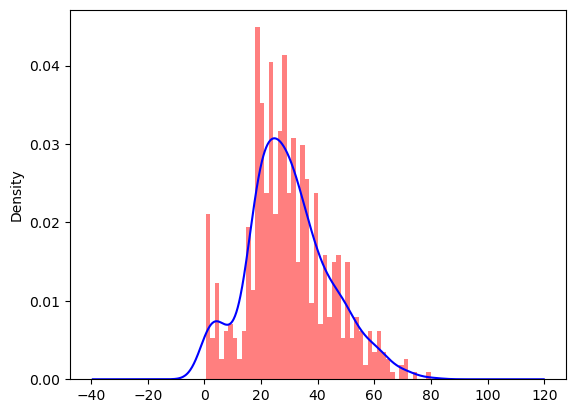

In [5]:
a=train['Age'].hist(bins=50,color='red',density=True,alpha=0.5)
train['Age'].plot(kind='density',color='blue')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

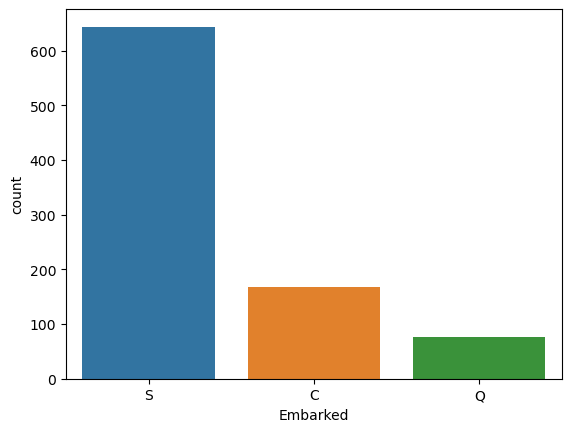

In [6]:
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train)

# Handling Missing Values

In [7]:
train_data=train.copy()

In [8]:
train['Age'].median()

28.0

In [9]:
train_data['Age'].fillna(train['Age'].median(),inplace=True)

train_data['Embarked'].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

train_data.drop('Cabin', axis=1, inplace=True)

In [10]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis and Visualization

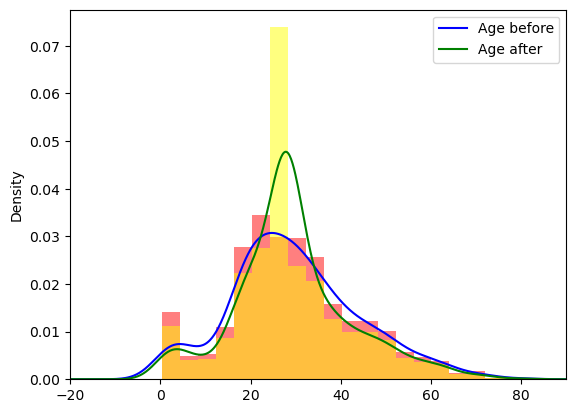

In [11]:
a=train['Age'].hist(bins=20,density=True,color='red',alpha=0.5)
train['Age'].plot(kind='density',color='blue')

b=train_data['Age'].hist(bins=20,density=True,color='yellow',alpha=0.5)
train_data['Age'].plot(kind='density',color='green')
plt.xlim(-20,90)
a.legend(['Age before','Age after'])

In [12]:
train_data=pd.get_dummies(train_data,columns=['Sex','Embarked'])

In [13]:
train_data.drop('PassengerId',axis=1,inplace=True)
train_data.drop('Name',axis=1,inplace=True)
train_data.drop('Ticket',axis=1,inplace=True)

In [14]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [15]:
train_data['Sex_female']=np.where(train_data['Sex_female']==True,1,0)
train_data['Sex_male']=np.where(train_data['Sex_male']==True,1,0)
train_data['Embarked_C']=np.where(train_data['Embarked_C']==True,1,0)
train_data['Embarked_Q']=np.where(train_data['Embarked_Q']==True,1,0)
train_data['Embarked_S']=np.where(train_data['Embarked_S']==True,1,0)

In [16]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


(-10.0, 90.0)

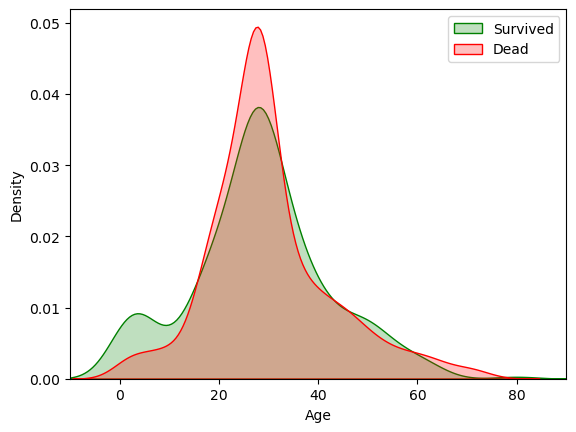

In [17]:
a=sns.kdeplot(train_data['Age'][train_data.Survived==1],color='green',fill=True)
sns.kdeplot(train_data['Age'][train_data.Survived==0],color='red',fill=True)
plt.legend(['Survived','Dead'])
plt.xlim(-10,90)

<Axes: xlabel='Pclass', ylabel='Survived'>

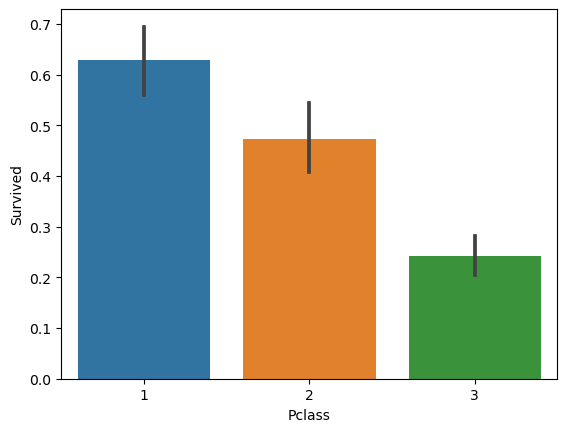

In [18]:
sns.barplot(x='Pclass',y='Survived',data=train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

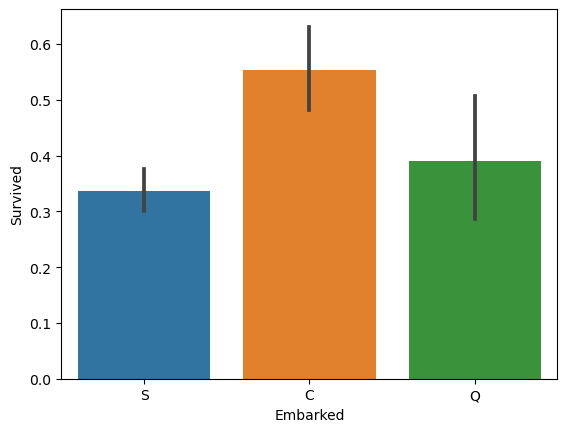

In [19]:
sns.barplot(x='Embarked',y='Survived',data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

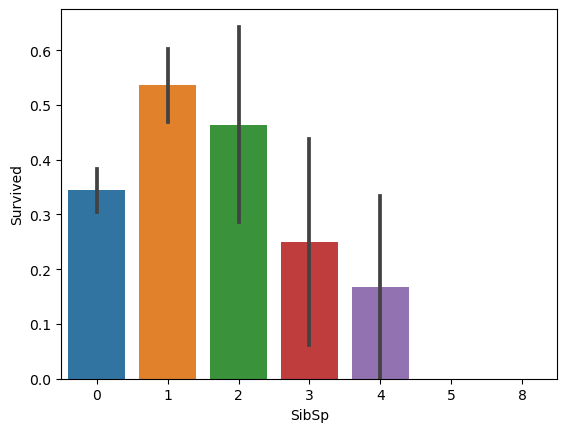

In [20]:
sns.barplot(x='SibSp',y='Survived',data=train)

<Axes: xlabel='Parch', ylabel='Survived'>

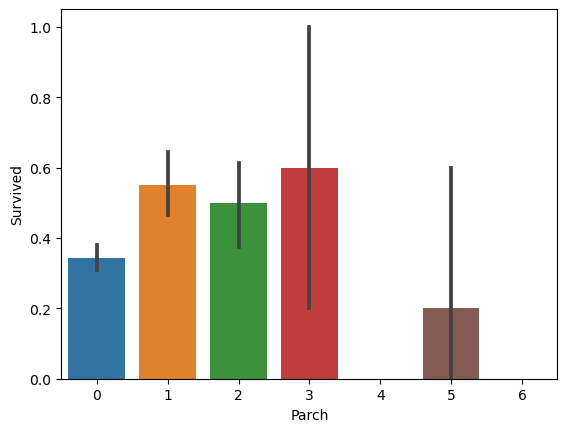

In [21]:
sns.barplot(x='Parch',y='Survived',data=train)

<Axes: xlabel='Sex', ylabel='Survived'>

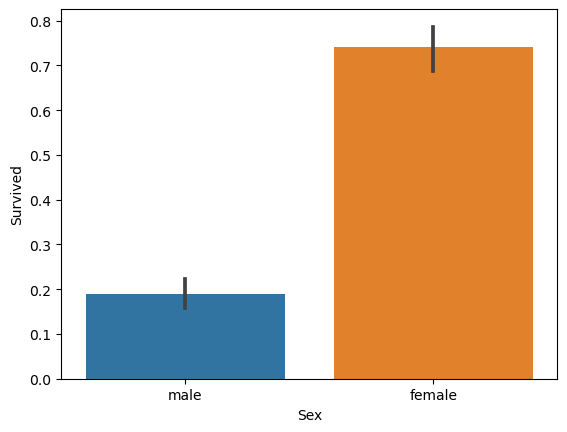

In [22]:
sns.barplot(x='Sex',y='Survived',data=train)

In [23]:
train_data['Travel_Alone']=np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)

In [24]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [25]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Travel_Alone
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,1
887,1,1,19.0,30.0000,1,0,0,0,1,1
888,0,3,28.0,23.4500,1,0,0,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,1


<Axes: xlabel='Travel_Alone', ylabel='Survived'>

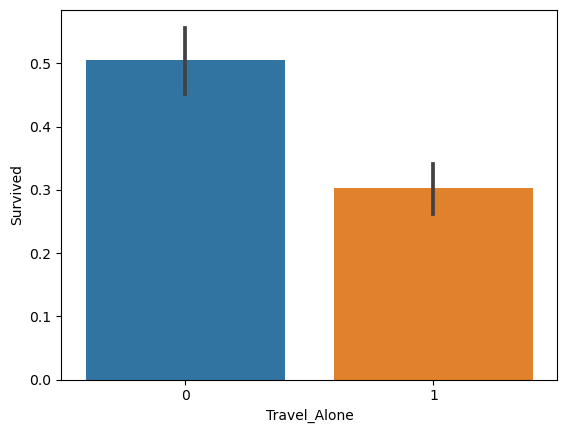

In [26]:
sns.barplot(x='Travel_Alone', y='Survived', data=train_data)

<Axes: >

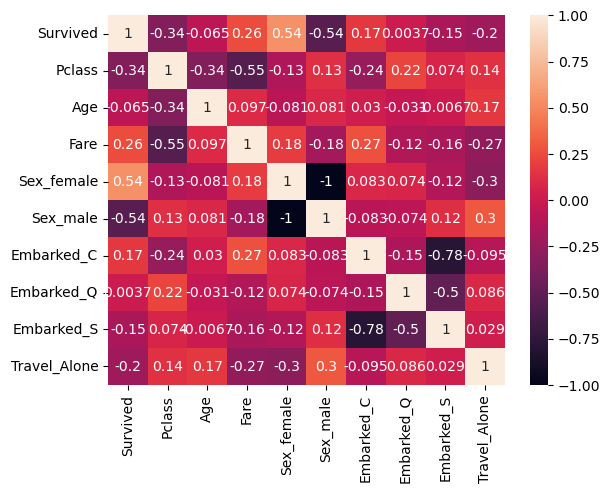

In [27]:
sns.heatmap(train_data.corr(), annot=True)

In [28]:
cols=['Pclass','Age','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Travel_Alone']
train_x=train_data[cols]
train_y=train_data['Survived']

# Model Training

In [29]:
train_x=train_x.values
train_y=train_y.values

In [30]:
split=0.8
x_train=train_x[:int(train_x.shape[0]*split),:]
y_train=train_y[:int(train_y.shape[0]*split)]

x_test=train_x[int(train_x.shape[0]*split):,:]
y_test=train_y[int(train_y.shape[0]*split):]

In [31]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))

ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [33]:
def hypothesis(x,weights):
    return sigmoid(np.dot(x,weights))

In [34]:
def loss(x,y,weight):
    pred=hypothesis(x,weight)
    loss=np.mean(y*np.log(pred)+(1-y)*np.log(1-pred))
    return -1*loss

In [35]:
def gradient(x,y,weights):
    pred=hypothesis(x,weights)
    grad=np.dot(x.T,(y-pred))
    return grad/x.shape[0]

In [36]:
def gradient_descent(x,y):
    weights=np.zeros((x.shape[1],))
    epochs=100000
    lr_rate=0.003
    list_loss=[]
    
    for i in range(epochs):
        grad=gradient(x,y,weights)
        list_loss.append(loss(x,y,weights))
        weights=weights+(lr_rate*grad)
    return weights,list_loss

In [37]:
weights,list_loss=gradient_descent(x_train,y_train)

# Loss Visualization

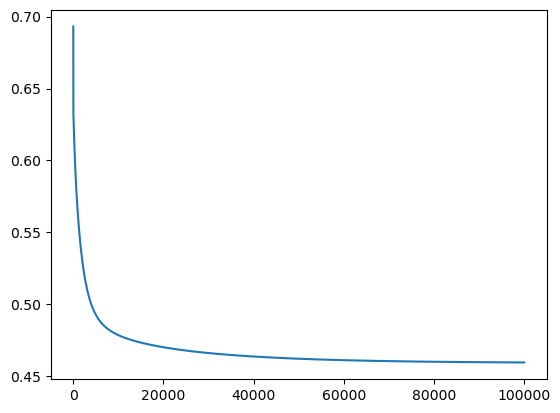

In [38]:
plt.plot(list_loss)

In [39]:
pred=[]
for i in range(x_test.shape[0]):
    y_hat=hypothesis(x_test[i],weights)
    print(y_hat,y_test[i])
    
    if y_hat>=0.5:
        pred.append(1)
    else:
        pred.append(0)

0.2982756954095477 1
0.0916081724123996 0
0.13900566656795926 0
0.11486891807320257 0
0.9241858445769067 1
0.7997043082441445 1
0.13450745137209982 0
0.08363432989090228 0
0.8502813673442354 1
0.10367483631622279 0
0.20245016825960693 0
0.14513329920816004 0
0.4187114874402729 1
0.11229287510285048 0
0.7574493479781177 1
0.6726426821697639 1
0.21145551878831353 0
0.5547453945498189 0
0.9085303155278552 1
0.1966249412069292 0
0.22891146925792788 0
0.2507701731964653 0
0.2507701731964653 0
0.0924141806391049 0
0.40853068843269885 0
0.4680049703095838 1
0.0937813997784056 0
0.0937813997784056 0
0.4557760227255619 1
0.3622297096647305 0
0.9397422883334614 1
0.08810302239352556 0
0.08756405033773197 1
0.19513271101658616 0
0.10548320368963786 0
0.7871653364894501 1
0.4683065712789645 0
0.1263441916206672 0
0.8571118936793276 1
0.13205653819128452 1
0.08357595734402445 0
0.10502350497761313 0
0.66078394158637 1
0.3319374950664425 1
0.0937851534942527 0
0.27525026822015486 0
0.081718541759296

# Checking Accuracy

In [40]:
corr=0
for i in range(y_test.shape[0]):
    if pred[i]==y_test[i]:
        corr+=1
print(corr/y_test.shape[0])

0.8100558659217877
